# Lab 01: Setup computing environment and introduction

Welcome to ANLY 580!

We'll use *Jupyter Notebooks* to write and run our Python code. In Python, a *package* refers to a collection of Python files (sometimes called modules) that contain functions, classes, and other objects that can be installed and used. Jupyter Notebooks are convenient, web-based cells that can run Python code within a specified environment. An *environment* is a specification or collection of packages and their associated versions. Using environments makes it easy to manage versions of software so that you can maintain multiple separate environments at once and allow others to exactly reproduce your Python ecosystem.

The Notebook page is not static; it's interactive and allows you to execute code in your browser. Although in practice we typically organize projects in Git repositories containing Python modules and packages, Jupyter Notebooks are well-suited for certain programming tasks, pedagogical purposes, and integrating executable code with other media (images, LaTeX, and more). For example, cells can be executed out-of-order and plots can be displayed in-line. Crucially, with Google Colaboratory, you can also request an environment that leverages GPUs, which are critical to modern deep learning.

Often, the packages of interest in AI software development include some subset of the following:
- *matplotlib* and *plotly*: for plotting data
- *numpy*: for efficient manipulation of array
- *pandas*: for working with tabular data
- *pytorch* and *tensorflow*: two popular deep learning frameworks
- *sklearn*: for statisical learning (e.g., regression, classification, and others)
- *spacy*: for natural language processing (NLP) experimentation
- *transformers*: for cutting-edge deep learning-based NLP models

In this class, we'll be managing our compute packages and environments using the *Anaconda distribution*, which contains some of the most common packages for data science software development.

Follow the instructions in `computing-setup.md` to create an environment for this class.

Let's get started!

**Problem 1.** Run this block of code to ensure your dependencies are installed.

In [24]:
from matplotlib import pyplot as plt
import numpy as np
import tensorflow
import torch

In [25]:
import sys
sys.version

'3.9.12 (main, Apr  5 2022, 01:52:34) \n[Clang 12.0.0 ]'

**Problem 2.** For this problem, use the text of Moby Dick (`moby_dick.txt`) throughout.

(A) Write a function `count_words(infile)` that takes a file as input and returns the total number of words in the file.

(B) Modify your `counts_words` function to accept a second argument `unique` that, if true, returns the number of unique words in the file. If `unique` is false, its behavior should be unchanged from Part (A).

(C) Within a function `get_ranks_and_frequencies(infile)`, use the `Counter` data structure from the `collections` module to compute word ranks and frequencies for every word in the text. The function should output a list that stores tuples, where the first element of each tuple is the ranking of the word (counting one-up, so the word that is most frequent receives rank=1, the word that is second most frequent receives rank=2, and so on) and the second element is the frequency value.

(D) With descending order of frequency, plot the logarithm of the frequency versus the logarithm of the rank for each word. What rough shape is the graph? 

In [ ]:
%matplotlib inline

In [10]:
# Part (A)
'''(A) Write a function `count_words(infile)` 
that takes a  file as input and returns the total number of words in the file.'''
def count_words(infile):
    file = open(infile)
    read_data = file.read()
    per_word = read_data.split() #split each sentence into words
    total_words = len(per_word)
    print('Total Words: ', total_words)
    pass

infile = "moby_dick.txt"
print(count_words(infile))

Total Words:  214112
None


In [20]:
# Part (B)
'''(B) Modify your `counts_words` function to accept a second argument `unique` that, 
if true, returns the number of unique words in the file. 
If `unique` is false, its behavior should be unchanged from Part (A).'''
import string
def count_words(infile, unique=True):
    file = open(infile)
    read_data = file.read()
    if unique == False:
        per_word = read_data.split() #split each sentence into words
        total_words = len(per_word)
        return print('Total Words: ', total_words)

    else:
        unique_words = set()
        for line in read_data:
            line = "".join([c for c in line if c not in string.punctuation])
            line = [word.lower() for word in line.split()]
            unique_words.update(line)
        return print('Unique words:', len(unique_words))
    
    pass

infile = "moby_dick.txt"
print(count_words(infile, unique=True))

Unique words: 36
None


In [49]:
# Part (C)
"""Within a function `get_ranks_and_frequencies(infile)`, 
use the `Counter` data structure from the `collections` module to compute word ranks and frequencies for every word in the text. 
The function should output a list that stores tuples, where the first element of each tuple is the ranking of the word (counting one-up, 
so the word that is most frequent receives rank=1, the word that is second most frequent receives rank=2, and so on) and the second element is the frequency value."""
from collections import Counter

def get_ranks_and_frequencies(infile):
    output = []
    file = open(infile)
    data = file.read()
    words = data.split() #split each sentence into words
    count = Counter(words).most_common()# get words count in desc order
    return count
    pass

infile = "moby_dick.txt"
print(get_ranks_and_frequencies(infile))

[('the', 13666), ('of', 6535), ('and', 5920), ('a', 4508), ('to', 4486), ('in', 3841), ('that', 2690), ('his', 2415), ('I', 1725), ('with', 1652), ('as', 1596), ('is', 1581), ('was', 1567), ('it', 1520), ('he', 1492), ('for', 1377), ('all', 1301), ('at', 1223), ('this', 1161), ('by', 1117), ('from', 1062), ('but', 1032), ('not', 1028), ('be', 985), ('on', 918), ('so', 790), ('you', 773), ('one', 760), ('have', 751), ('had', 751), ('or', 719), ('were', 646), ('But', 639), ('their', 611), ('an', 579), ('are', 577), ('some', 571), ('they', 569), ('my', 560), ('him', 554), ('which', 552), ('like', 545), ('The', 542), ('upon', 531), ('into', 517), ('when', 502), ('now', 458), ('no', 443), ('out', 436), ('more', 432), ('there', 415), ('up', 414), ('old', 412), ('would', 407), ('if', 405), ('been', 401), ('we', 396), ('whale', 392), ('what', 380), ('its', 372), ('these', 364), ('over', 361), ('other', 358), ('only', 349), ('will', 346), ('me', 339), ('then', 338), ('such', 328), ('And', 321),

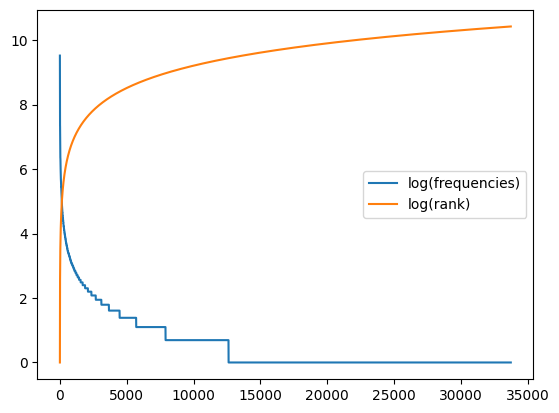

In [27]:
# Part (D)
"""With descending order of frequency, plot the logarithm of the frequency versus the logarithm of the rank for each word. 
What rough shape is the graph? """

import math

infile = "moby_dick.txt"

ranks_and_frequencies = get_ranks_and_frequencies(infile)
freq = [] #the frequency for each word
rank = [] #the rank for each word
i = 0
for item in ranks_and_frequencies:
    x = math.log(item[1]) #calculate log for frequencies
    freq.append(x)
    i += 1
    y = math.log(i) # calculate log for rank
    rank.append(y)

# plot
plt.plot(freq, label = "log(frequencies)")
plt.plot(rank, label = "log(rank)")
plt.legend()
plt.show()

**Problem 3.** In this problem, we'll work with *regular expressions*, which are specifications of matching string patterns. We'll work using the introductory content in Chapter 1 of *Moby Dick*. This is short enough for you to look at the text before and after specific operations are performed. Follow through the basic examples to see how you can match against specified patterns and process the text from there in useful ways. You should review the `re` module from the Python documentation; here, we will survey just a few examples.

(A) After experimenting with `re.sub`, use `re.compile` and `re.search` to write a function that checks whether its input is a valid Georgetown NetID. For this problem, let's assume that a valid ID consists of 2-4 lowercase letters followed by no more than 4 digits. For instance, "abc123" is a valid NetID but "ab12345" and "x36" are not.

In [31]:
import re

text = "CHAPTER 1. Loomings. Call me Ishmael. Some years ago—never mind how long precisely—having little or no money in my purse, and nothing particular to interest me on shore, I thought I would sail about a little and see the watery part of the world. It is a way I have of driving off the spleen and regulating the circulation. Whenever I find myself growing grim about the mouth; whenever it is a damp, drizzly November in my soul; whenever I find myself involuntarily pausing before coffin warehouses, and bringing up the rear of every funeral I meet; and especially whenever my hypos get such an upper hand of me, that it requires a strong moral principle to prevent me from deliberately stepping into the street, and methodically knocking people’s hats off—then, I account it high time to get to sea as soon as I can. This is my substitute for pistol and ball. With a philosophical flourish Cato throws himself upon his sword; I quietly take to the ship. There is nothing surprising in this. If they but knew it, almost all men in their degree, some time or other, cherish very nearly the same feelings towards the ocean with me."

# \d is a special symbol that matches digits [0-9]
# the + symbol means to match one or more of the preceding element
# this substitution matches digits, replaces them with the empty string
# i.e. omits them, and is applied over the text variable
re.sub(r"\d+", "", text)


# You can specify your own character classes, too
# You may want to remove certain punctuation symbols like periods, commas, and semicolons
re.sub(r"[\;\.\,']", " ", text)


def is_valid_netid(netid):
    # set pattern to match
    pattern = re.compile(r"[a-z]{2,4}\d{1,4}")
    result = re.search(pattern, netid)
    if result == None:
        return False
    return True

print(is_valid_netid("abc4123"))

True


**Problem 4.** Let's take a brief look at the `NumPy` library. The basic object in the library is the multidimensional array, where each dimension is called an *axis*. All of its elements are of the same type and usually hold numeric data. NumPy arrays are typed as `ndarray`.

You can create an array in various ways. For instance, the `array` function can take a Python list and convert it into an `ndarray`:

In [32]:
a = np.array([1, 2, 3, 4]) #1d array
b = np.array([[1.0, 2, 3, 4], [5, 6, 7, 8]]) #2d array
c = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]]) #2d array

print("shape of a", a.shape) # an array with one axis of length 4
print("shape of b", b.shape) # an array with two axes; the first of length 2, the second of length 4
print("shape of c", c.shape) # an array with two axes; the first of length 3, the second of length 4

print("a.dtype", a.dtype) # integer
print("b.dtype", b.dtype) # float

shape of a (4,)
shape of b (2, 4)
shape of c (3, 4)
a.dtype int64
b.dtype float64


Indexing operations behave as expected:

In [33]:
print("b[0, 0]", b[0, 0]) # fetch the value at the 0th position of the 1st axis and the 0th position of the 2nd axis
print("b[-1, -1]", b[-1, -1]) # fetch the value at the last position of the 1st axis and the last position of the 2nd axis

b[1,1] = 10 # updates array value; set the value at index [1,1] to 1
print("b", b)

print("b[:, 1]", b[:, 1]) # fetch all the values along the 1st position in the 2nd axis (i.e., the second column of the matrix)

print("b[-1]", b[-1]) # equivalent to b[-1, :] and b[-1, ...] i.e. the last row

b[0, 0] 1.0
b[-1, -1] 8.0
b [[ 1.  2.  3.  4.]
 [ 5. 10.  7.  8.]]
b[:, 1] [ 2. 10.]
b[-1] [ 5. 10.  7.  8.]


Here is a brief survey of some typical functionalities:

In [35]:
a = np.arange(10) # an array of 10 integers, 0-9 (analogous to Python's range)
print("a", a)
print("a reshaped", a.reshape(2, 5)) # reshape array
print("a", a) # original array
print("a dim", a.ndim) # 2 axes

print("zeros", np.zeros((2, 3))) # an array of all 0s
print("ones", np.ones((2, 3))) # an array of all 1s

np.random.random((3,4)) # random module provides functions to create ndarrays with random values

print("linspace", np.linspace(0, 1, 100)) # an array with 100 evenly-spaced numbers, from 0 to 1

a [0 1 2 3 4 5 6 7 8 9]
a reshaped [[0 1 2 3 4]
 [5 6 7 8 9]]
a [0 1 2 3 4 5 6 7 8 9]
a dim 1
zeros [[0. 0. 0.]
 [0. 0. 0.]]
ones [[1. 1. 1.]
 [1. 1. 1.]]
linspace [0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475

Here are some additional examples. Take time to understand them, and feel free to test each one.

In [36]:
A = np.array([[1, 1], [0, 1]])
B = np.array([[2, 0], [3,4]])

print("A", A)
print("Hadamard product", A*B) # Hadamard/element-wise product

print("matrix product", A@B) # matrix product

print("matrix product", A.dot(B)) # matrix product

print("sum", A.sum()) # sum over all elements
print("min", A.min()) # min over all elements
print("max", A.max()) # max over all elements


print("apply operation across the row direction", A.sum(axis=0)) # sum of each column, i.e. operation applied across the direction along the rows

print("apply the operation across the column direction", A.sum(axis=1)) # sum of each row, i.e. operation applied across the direction along the columns

print("concat", np.concatenate((A, B), axis=0)) # concatenate along rows
print("concat shape", np.concatenate((A, B), axis=0).shape)

q1 = np.empty((3, 4)) # creates a (3,4) array from values in memory
q2 = np.empty((3, 4))
print("stack", np.stack((q1, q2))) # stack two arrays of the same shape to create a (2, 3, 4) array

B = np.arange(3)
print("exponential applied to each element", np.exp(B)) # exponential function applied to each

A [[1 1]
 [0 1]]
Hadamard product [[2 0]
 [0 4]]
matrix product [[5 4]
 [3 4]]
matrix product [[5 4]
 [3 4]]
sum 3
min 0
max 1
apply operation across the row direction [1 2]
apply the operation across the column direction [2 1]
concat [[1 1]
 [0 1]
 [2 0]
 [3 4]]
concat shape (4, 2)
stack [[[7.41348308e-001 5.64223512e-002 3.24683890e-001 2.52779611e-001]
  [5.63970298e-001 7.89096375e-001 1.65218162e-001 3.68580622e-001]
  [4.11838669e-002 7.17201693e-001 4.17582623e-001 7.91239431e-001]]

 [[2.31584178e+077 2.31584178e+077 2.96439388e-323 0.00000000e+000]
  [0.00000000e+000 0.00000000e+000 2.31584178e+077 2.31584178e+077]
  [1.48219694e-323 0.00000000e+000 0.00000000e+000 8.34402697e-309]]]
exponential applied to each element [1.         2.71828183 7.3890561 ]


**Problem 5.** Explain in words what the following code does.

(A) 

```
C = np.arange(24).reshape(2,3,4)
C.sum(axis=0)
```

(B) 

```
C = np.arange(24).reshape(2,3,4)
C.sum(axis=1)
```

(C)

```
C = np.arange(24).reshape(2,3,4)
C.sum(axis=2)
```

In [45]:
# Your explanation goes here
#（A）
C = np.arange(24).reshape(2,3,4)
print(C)
# Generate an array containing the integers from 0 to 23. Reshape the array to 2 matrixes, each is 3d array with 4 elements in each row.

# (A)
# Generate a matrix by adding up elements at corresponding same positions in the two matrixes

# (B) 
# Generate a matrix by calculating the sum of each column of the two matrixs. 
# Each row of the new matrix represents the sum of each column of a matrix.

# (C)
# Generate a matrix by calculating the sum of each row of the two matrixs.
# Each row of the new matrix represents the sum of each row of a matrix.

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


array([[ 6, 22, 38],
       [54, 70, 86]])

**Problem 6.** Complete the function `linear_transformation()` by implementing a matrix multiplication between the data matrix, `X` of size `M x N`, and the tensor, `W` of size `N x N` (an identity matrix).

In [46]:
def linear_transformation(X, W):
    """
    Parameters
    ----------
    X: np.array (M x N)
        Data matrix
    W: np.array(N x N)
        Linear transformation
    Returns
    -------
    X_prime: np.array (M x N)
    """
    # Your code goes here
    X_prime = np.dot(X, W)
    return X_prime
    pass

In [47]:
W = np.identity(10)
X = np.random.random((300, 10))

In [48]:
X_tx = linear_transformation(X, W)
assert (X_tx == X).all()